# Store Sales Forecasting on Corporation Favorita Grocery Stores

### Objectives

To predict in advance the sales required so as to avoid over-stocking and under-stocking. This will help provide a good customer experience while avoiding losses.

### Hypothesis: Does promotions positively impact overall sales

### Research Questions
1. Is the train data set complete(has all the required dates)?
2. Which dates have the lowest and highest sales for each year?
3. Are certain stores selling more products?
4. Did the earthquake impact sales?
5. Are sales affected by promotions?
6. What analysis can we get from the date and its extractable features?
7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings("ignore")


In [2]:
#load the datasets and set date as type datetime
train_data = pd.read_csv('train.csv', parse_dates =['date'])
test_data = pd.read_csv('test.csv', parse_dates =['date'])
store_data = pd.read_csv('stores.csv')
transaction_data = pd.read_csv('transactions.csv', parse_dates =['date'])
sample_submission = pd.read_csv('sample_submission.csv')
oil_data = pd.read_csv('oil.csv', parse_dates =['date'])
holidays_events = pd.read_csv('holidays_events.csv',parse_dates =['date'] )

### Checking out each dataset


In [3]:
# Train data
train_data.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [5]:
# Test data
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [7]:
#Store Data
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [9]:
#transcation data
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [11]:
#sample submission
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [12]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [13]:
#oil data
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [14]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [15]:
#holiday events
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [16]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


### Check for missing values in the all the data sets

In [17]:
#train data
train_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [18]:
#test data
test_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [19]:
# store data
store_data.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [20]:
#transaction data
transaction_data.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [21]:
#sample submission
sample_submission.isna().sum()

id       0
sales    0
dtype: int64

In [22]:
#oil data
oil_data.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [23]:
#holidays events
holidays_events.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

###### Only the Oil Data has 43 missing values choice needs to be made whether to drop them or fill them

### Visualization

#### Train Data

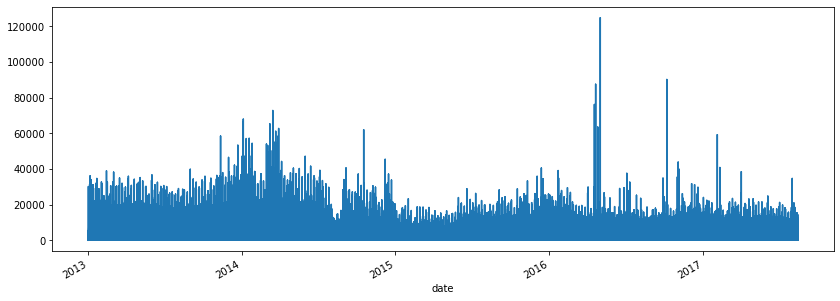

In [24]:
#checking on the distribution of sales on all the stores
sales_dis = train_data.groupby(["date", "store_nbr","onpromotion"]).sales.sum().reset_index()
a = sales_dis.set_index('date')['sales'].plot(figsize=(14, 5))

#### Store Data

Text(0.5, 0, 'Count')

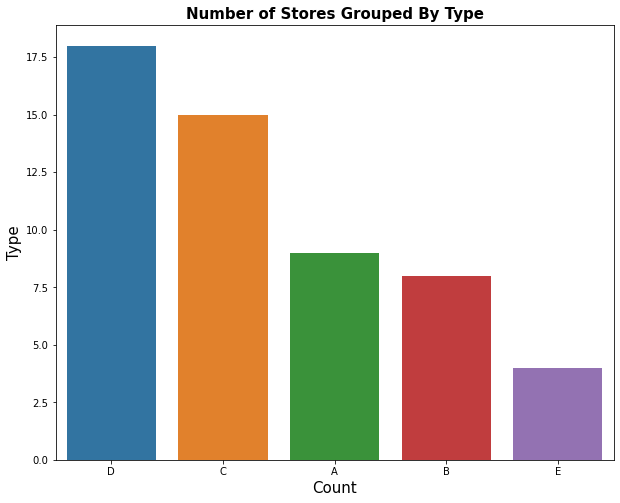

In [25]:
# no of store grouped by type 
plt.figure(figsize=(10, 8))
sns.countplot(data=store_data, x='type',
              order=store_data.type.value_counts().index,)
plt.title('Number of Stores Grouped By Type',fontweight="bold",fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.xlabel('Count', fontsize=15)

Group D has the most number of stores.

#### Oil Data

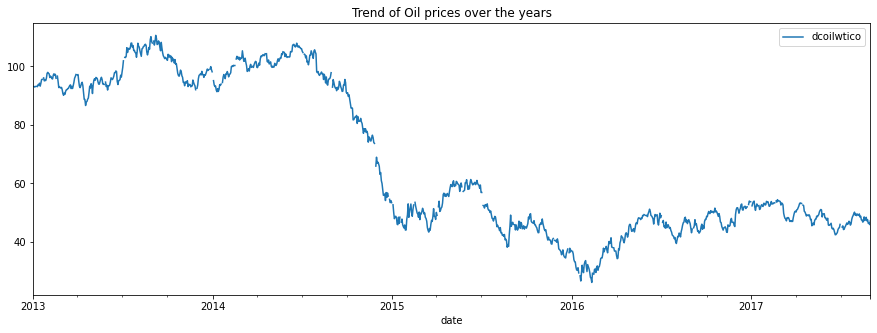

In [26]:
ax = oil_data.plot('date', 'dcoilwtico', title='Trend of Oil prices over the years', figsize=(15,5))

The oil prices seems to have gone down as the year progressed. This must have hard an impact in the store sales.

### 1. Is the train data set complete(has all the required dates)?

In [27]:
#creating a copy of the train data for analysis
train = train_data.copy(deep=True)

In [28]:
#unique values relate to the dates
train['date'].nunique()

1684

In [29]:
#range of dates expected in the complete data
train['date'].min(),train['date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [30]:
#expected values for the data to be complete
total = train['date'].max()-train['date'].min()

total.days + 1

1688

In [31]:
expected_dates = pd.date_range(start=train['date'].min()  , end=train['date'].max())
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [32]:
# show missing dates
missing_date_list = pd.date_range(start='2013-01-01', end='2017-08-15').difference(train.date.unique())
print(missing_date_list)

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


The missing dates on the data fall on the 25th of each year. This is the Christmas Holiday, it can be assumed that the stores are normally closed on this particular day and not in operation.

### 2. Which dates have the lowest and highest sales for each year?

In [33]:
train = train.set_index('date')

In [34]:
train['Date']= train.index
train['Month']= train.index.month

In [35]:
train['Year']= train.index.year


<AxesSubplot:xlabel='Year', ylabel='sales'>

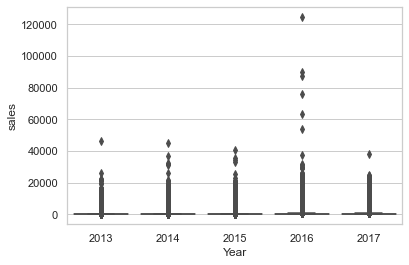

In [36]:
sns.set(style = 'whitegrid')
sns.boxplot( x= 'Year', y= 'sales', data = train)


In [37]:
yearly_sales = train.groupby('Year').sales.agg(['min', 'max'])
yearly_sales

,min,max
Year,,
2013,0.0,46271.000
2014,0.0,45361.000
2015,0.0,40351.460
2016,0.0,124717.000
2017,0.0,38422.625


It shows that every year there were days where no sales were made. We find that 2016 recorded the highest sale in the given period which is over 100% higher than the maximum sales per day for the other years.

### 3. Did the earthquake impact sales?

In [38]:
train['Date'] = pd.to_datetime(train['Date'])

In [39]:
train['Date']= train['Date'].astype(str)

In [40]:
#Average sales before earthquake ,i.e 2016-04-01 to 2016-04-15
before_earthquake =train[( train['Date'] > '2016-04-01') &  (train['Date']<= '2016-04-15')]
before_earthquake

,id,store_nbr,family,sales,onpromotion,Date,Month,Year
date,,,,,,,,
2016-04-02,2109888,1,AUTOMOTIVE,6.000000,0,2016-04-02,4,2016
2016-04-02,2109889,1,BABY CARE,0.000000,0,2016-04-02,4,2016
2016-04-02,2109890,1,BEAUTY,3.000000,0,2016-04-02,4,2016
2016-04-02,2109891,1,BEVERAGES,2317.000000,2,2016-04-02,4,2016
2016-04-02,2109892,1,BOOKS,0.000000,0,2016-04-02,4,2016
...,...,...,...,...,...,...,...,...
2016-04-15,2134831,9,POULTRY,407.525000,17,2016-04-15,4,2016
2016-04-15,2134832,9,PREPARED FOODS,63.760002,1,2016-04-15,4,2016
2016-04-15,2134833,9,PRODUCE,987.550000,1,2016-04-15,4,2016


In [41]:
#the average sales before earthquake
avg_before_earthquake = before_earthquake['sales'].mean()
avg_before_earthquake

445.007176512935

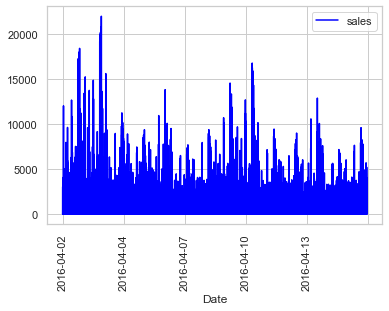

In [42]:
first_plot = before_earthquake.plot(x='Date',y='sales',kind='line',color='blue',rot=90)
plt.legend()
plt.show()

In [43]:
#Average sales after earthquake ,i.e from 2016-04-17 going
after_earthquake =train[( train['Date'] > '2016-04-17') &  (train['Date']<= '2016-04-30')]
after_earthquake

,id,store_nbr,family,sales,onpromotion,Date,Month,Year
date,,,,,,,,
2016-04-18,2138400,1,AUTOMOTIVE,14.00000,0,2016-04-18,4,2016
2016-04-18,2138401,1,BABY CARE,0.00000,0,2016-04-18,4,2016
2016-04-18,2138402,1,BEAUTY,3.00000,0,2016-04-18,4,2016
2016-04-18,2138403,1,BEVERAGES,4155.00000,1,2016-04-18,4,2016
2016-04-18,2138404,1,BOOKS,0.00000,0,2016-04-18,4,2016
...,...,...,...,...,...,...,...,...
2016-04-30,2161561,9,POULTRY,826.35300,0,2016-04-30,4,2016
2016-04-30,2161562,9,PREPARED FOODS,165.65399,0,2016-04-30,4,2016
2016-04-30,2161563,9,PRODUCE,2012.72700,1,2016-04-30,4,2016


In [44]:
#the average sales after earthquake
avg_after_earthquake = after_earthquake['sales'].mean()
avg_after_earthquake

511.72250327857483

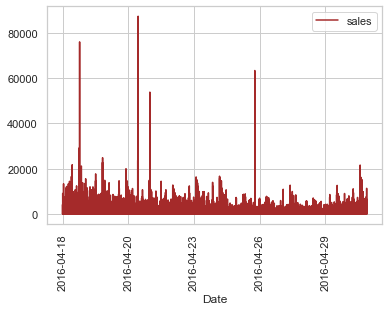

In [45]:
second_plot = after_earthquake.plot(x='Date',y='sales',kind='line',color='brown',rot=90)
plt.legend()
plt.show()

From the average sales before the eartnquake (445) and the average sales after the earthquake(511.8). It is clear that the earthquake didn't affect the stores sales in a negative way. 

### 4. Are certain stores selling more products?

In [46]:
train['store_nbr'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Series name: store_nbr
Non-Null Count    Dtype
--------------    -----
3000888 non-null  int64
dtypes: int64(1)
memory usage: 45.8 MB


In [47]:
train['store_nbr']= train['store_nbr'].apply(str)
train['store_nbr']

date
2013-01-01    1
2013-01-01    1
2013-01-01    1
2013-01-01    1
2013-01-01    1
             ..
2017-08-15    9
2017-08-15    9
2017-08-15    9
2017-08-15    9
2017-08-15    9
Name: store_nbr, Length: 3000888, dtype: object

In [48]:
Store_no = train.groupby('store_nbr').sales.agg(['sum']).sort_values(by=['sum'],ascending=False)
Store_no.head(10)

,sum
store_nbr,
44,6.208755e+07
45,5.449801e+07
47,5.094831e+07
3,5.048191e+07
49,4.342010e+07
46,4.189606e+07
48,3.593313e+07
51,3.291149e+07
8,3.049429e+07


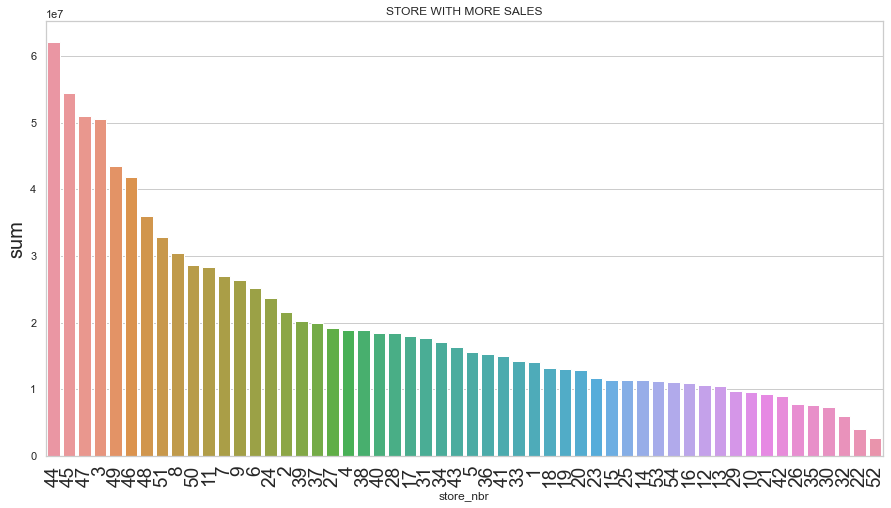

In [49]:
plt.figure(figsize=(15,8))
plt.title('STORE WITH MORE SALES')
plt.xticks(fontsize=19,rotation='vertical')
plt.ylabel('SALES',fontsize=20)
sns.barplot(x=Store_no.index,y=(Store_no['sum']))
plt.savefig('store_sales.png',dpi=300)
plt.show()

Store 44 had the most sales followed by store 45 and 47.

### 5. Are sales affected by promotions?

In [50]:
#converting 'onpromotion' to i
train['onpromotion']=train['onpromotion'].apply(int)
train['onpromotion']

date
2013-01-01      0
2013-01-01      0
2013-01-01      0
2013-01-01      0
2013-01-01      0
             ... 
2017-08-15      0
2017-08-15      1
2017-08-15    148
2017-08-15      8
2017-08-15      0
Name: onpromotion, Length: 3000888, dtype: int64

In [51]:
def promo(x):
    b=str(x)
    if '0' in b:
        return 'NO_PROMO'

    else:
        return 'PROMO'

In [52]:
train['onpromotion']=train['onpromotion'].apply( promo)
train.head(10)

,id,store_nbr,family,sales,onpromotion,Date,Month,Year
date,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,1,1,BABY CARE,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,2,1,BEAUTY,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,3,1,BEVERAGES,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,4,1,BOOKS,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,5,1,BREAD/BAKERY,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,6,1,CELEBRATION,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,7,1,CLEANING,0.0,NO_PROMO,2013-01-01,1,2013
2013-01-01,8,1,DAIRY,0.0,NO_PROMO,2013-01-01,1,2013


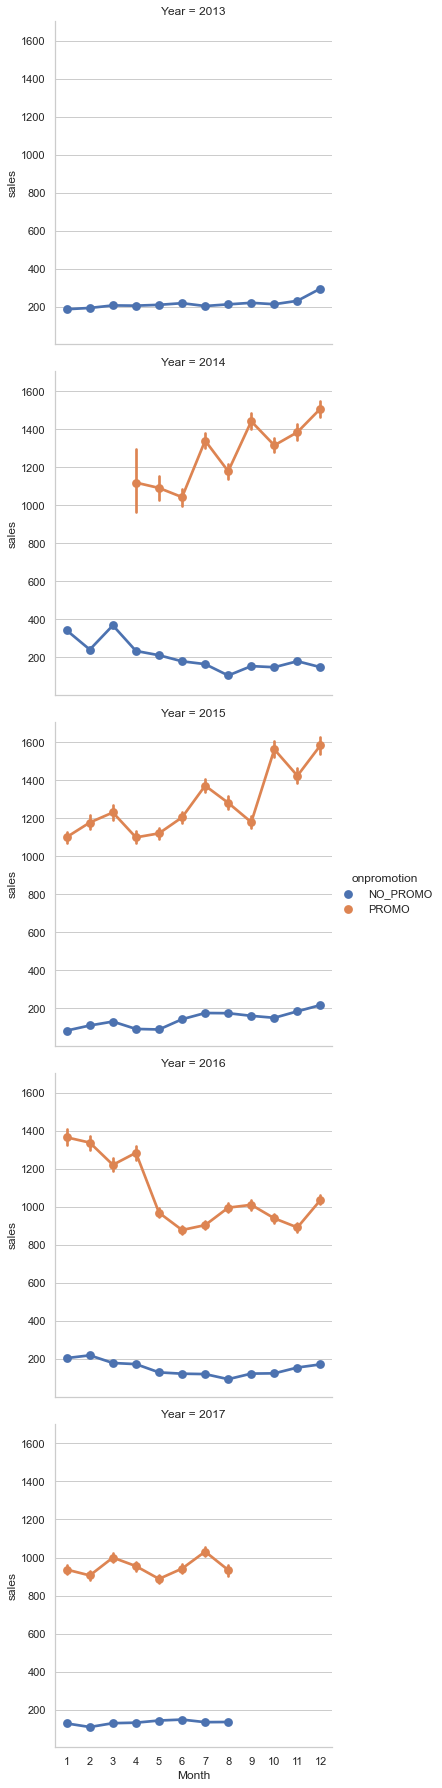

In [53]:
# Sales trend over the months
sns.catplot(data= train, x ='Month', y = 'sales', 
               # per store type in cols
               hue = 'onpromotion',
               row = 'Year',
               kind = 'point'
              );

<b> It seems there were no product promotions done in the year 2013.<b>
    
<b> It is evident from 2014 to 2017 that the products that were promoted recorded very high sales as compared to those that were not promoted.<b>
    
<b> Sales in general seems to increase towards the end of the year.<b>

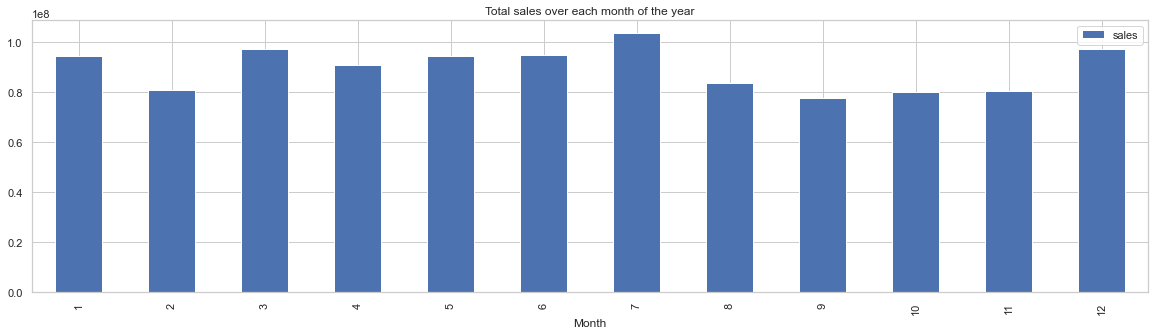

In [54]:
ax = train.groupby(['Month'], as_index=False)['sales'].sum()\
                                    .plot('Month', 'sales', kind='bar', figsize=(20,5),
                                         title='Total sales over each month of the year')

### Hypothesis

<b> It is evident from the above that promotion affected sales positively. In the year 2013 had no product promotions and the sales per momth were low.<b>
    
<b>Hence we can accept the hypothesis that promotions affect sales.<b>

## Feature Engineering

The following datasets will be added to the train and test dataset to create a data frame that will be used for creating the best model.

=> The store data set

=> The oil data set

=> Holiday Events data set


### merge the oil data set 

In [55]:
#check missing values
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [56]:
#fill missing values in the data set with the values before the missing
oil_data = oil_data.bfill()

In [57]:
oil_data.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [58]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1218 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [60]:
# merge the oil data to the train data set
train1_data = pd.merge(train_data, oil_data, on= 'date', how = 'left')
train1_data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,93.14


In [61]:
# merge the oil data to the test data set
test1_data = pd.merge(test_data, oil_data, on= 'date', how = 'left')
test1_data.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8
1,3000889,2017-08-16,1,BABY CARE,0,46.8
2,3000890,2017-08-16,1,BEAUTY,2,46.8
3,3000891,2017-08-16,1,BEVERAGES,20,46.8
4,3000892,2017-08-16,1,BOOKS,0,46.8


#### merge the store data set

In [62]:
store_data['store_nbr']= store_data['store_nbr'].astype(str)
train1_data['store_nbr']= train1_data['store_nbr'].astype(str)
test1_data['store_nbr']= test1_data['store_nbr'].astype(str)

In [63]:
#merge the stores data to the train data set
train1_data = train1_data.merge(store_data, on = 'store_nbr', how = 'left')
train1_data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13


In [64]:
#merge the stores data to the test data set
test1_data = test1_data.merge(store_data, on = 'store_nbr', how = 'left')
test1_data.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13


### merge the holiday data set

In [65]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [66]:
#drop the date and description column
holidays_events.drop(holidays_events.columns[[0]], axis=1, inplace=False)
holidays_events.drop(holidays_events.columns[[4]], axis=1, inplace=False)
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [67]:
#change the type column to holiday type
holidays_events.rename(columns={'type': 'holiday_type'}, inplace=True)
holidays_events

,date,holiday_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [68]:
#merging holidays dataset to train data
train1_data= train1_data.merge(holidays_events,how='left' ,on=['date'])
train1_data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [69]:
#check the unique holiday dates added
train1_data.holiday_type.unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [70]:
#merging holidays dataset to test data
test1_data= test1_data.merge(holidays_events,how='left' ,on=['date'])
test1_data.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster,holiday_type,locale,locale_name,description,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN


In [71]:

holidays_events['date'] = pd.to_datetime(holidays_events['date'])

### New Feature Creation

In [72]:
# Extracting year, month, day and week,etc and making new column
def getDateFeatures(df, date):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.isocalendar().week
    df['day_of_week'] = df.date.dt.dayofweek
    df['year'] = df.date.dt.year
    df['is_weekend']= np.where(df['day_of_week'] > 4, 1, 0)
    df['is_month_start']= df.date.dt.is_month_start.astype(int)
    df['is_month_end']= df.date.dt.is_month_end.astype(int)
    df['quarter']= df.date.dt.quarter
    df['is_quarter_start']= df.date.dt.is_quarter_start.astype(int)
    df['is_quarter_end']= df.date.dt.is_quarter_end.astype(int)
    df['is_year_start']= df.date.dt.is_year_start.astype(int)
    
    return df

In [73]:
def dayType(row):
    # Denote work days and holidays for days that were not holidays
    if row.holiday_type is np.NaN: 
        if row.is_weekend == 0:
            return 'Workday'
        else:
            return 'No Work'
    # Denote special days
    elif row.holiday_type == 'Transfer' or row.holiday_type == 'Additional' or row.holiday_type == 'Bridge' or row.holiday_type == 'Event':
        return 'Special'
    # Rename work days
    elif row.holiday_type == 'Work Day':
        return 'Workday'
    # Add transferred holidays to special days
    elif row.transferred:
        return 'Special'
    else:
        return row.holiday_type

In [74]:
#add the new function to the data set
train_d = getDateFeatures(train1_data, 'date')

In [75]:
# the new data set with the added features
train_d['day_type'] = train_d.apply(dayType,axis=1)
train_d.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,...,day_of_week,year,is_weekend,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,day_type
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Quito,Pichincha,D,...,1,2013,0,1,0,1,1,0,1,Holiday
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Quito,Pichincha,D,...,1,2013,0,1,0,1,1,0,1,Holiday
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Quito,Pichincha,D,...,1,2013,0,1,0,1,1,0,1,Holiday
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Quito,Pichincha,D,...,1,2013,0,1,0,1,1,0,1,Holiday
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Quito,Pichincha,D,...,1,2013,0,1,0,1,1,0,1,Holiday


In [76]:
train_d.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 30 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                3054348 non-null  int64         
 1   date              3054348 non-null  datetime64[ns]
 2   store_nbr         3054348 non-null  object        
 3   family            3054348 non-null  object        
 4   sales             3054348 non-null  float64       
 5   onpromotion       3054348 non-null  int64         
 6   dcoilwtico        2175822 non-null  float64       
 7   city              3054348 non-null  object        
 8   state             3054348 non-null  object        
 9   type              3054348 non-null  object        
 10  cluster           3054348 non-null  int64         
 11  holiday_type      502524 non-null   object        
 12  locale            502524 non-null   object        
 13  locale_name       502524 non-null   object

In [77]:
# fill the missing values with none
train_d.replace({'locale': {np.nan: 'None'},
                  'locale_name': {np.nan: 'None'},
                  'transferred': {np.nan: False}}, inplace=True)

### Features Encoding

In [78]:
#using the label encoder to handle the categorical variables
encoder = preprocessing.LabelEncoder()
cols = ['family','city', 'state', 'type', 'locale', 'locale_name', 'day_type', 'transferred']

for col in cols:
    train_d[col] = encoder.fit_transform(train1_data[col])

In [79]:
#working on the promotion column
min_p = train_d['onpromotion'].min()
max_p = train_d['onpromotion'].max()

#add bins to deal with the different values
bins = np.arange(min_p, max_p, (max_p - min_p)/5)
labels = [f"bin_{i}" for i in range(len(bins) -1)]

train_d['promotion'] = pd.cut(train_d['onpromotion'], bins = bins, labels = labels)

In [80]:
#using the mode to fill in missing values in promotion column
mode = train_d['promotion'].mode()[0]
train_d['promotion'].fillna(mode, inplace=True)

In [81]:
promotion_encoder = LabelEncoder()
train_d['promotion'] = promotion_encoder.fit_transform(train_d['promotion'])

In [82]:
#final data
train_d.head()


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,...,year,is_weekend,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,day_type,promotion
0,0,2013-01-01,1,0,0.0,0,93.14,18,12,3,...,2013,0,1,0,1,1,0,1,0,0
1,1,2013-01-01,1,1,0.0,0,93.14,18,12,3,...,2013,0,1,0,1,1,0,1,0,0
2,2,2013-01-01,1,2,0.0,0,93.14,18,12,3,...,2013,0,1,0,1,1,0,1,0,0
3,3,2013-01-01,1,3,0.0,0,93.14,18,12,3,...,2013,0,1,0,1,1,0,1,0,0
4,4,2013-01-01,1,4,0.0,0,93.14,18,12,3,...,2013,0,1,0,1,1,0,1,0,0


In [83]:
#checking for missing values
train_d.isnull().sum()

id                        0
date                      0
store_nbr                 0
family                    0
sales                     0
onpromotion               0
dcoilwtico           878526
city                      0
state                     0
type                      0
cluster                   0
holiday_type        2551824
locale                    0
locale_name               0
description         2551824
transferred               0
month                     0
day_of_month              0
day_of_year               0
week_of_year              0
day_of_week               0
year                      0
is_weekend                0
is_month_start            0
is_month_end              0
quarter                   0
is_quarter_start          0
is_quarter_end            0
is_year_start             0
day_type                  0
promotion                 0
dtype: int64

### Data set Splitting

In [84]:
train_d = train_d.set_index('date')
final_data1 = train_d.resample('D').mean()

In [85]:
final_data2 = final_data1.copy()
final_data2.reset_index(inplace=True)

In [86]:
# using the standard scaler to scale the data
final_data2.fillna(0, inplace=True)
scaler = StandardScaler()
final_data2[final_data2.columns[1:]]= scaler.fit_transform(final_data2[final_data2.columns[1:]])

In [87]:
final_df = pd.DataFrame(final_data2, columns = final_data2.columns)

In [88]:
final_df.head()

,date,id,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,...,year,is_weekend,is_month_start,is_month_end,quarter,is_quarter_start,is_quarter_end,is_year_start,day_type,promotion
0,2013-01-01,-1.722855,0.048737,-2.683254,-0.85446,1.190550,0.048737,0.048737,0.048737,0.048737,...,0.029973,-0.631275,5.398412,-0.183522,-1.271288,9.372412,-0.103819,18.346662,-2.045383,-0.32765
1,2013-01-02,-1.720803,0.048737,-0.592754,-0.85446,1.190550,0.048737,0.048737,0.048737,0.048737,...,0.029973,-0.631275,-0.185240,-0.183522,-1.271288,-0.106696,-0.103819,-0.054506,0.751004,-0.32765
2,2013-01-03,-1.718750,0.048737,-1.162968,-0.85446,1.186028,0.048737,0.048737,0.048737,0.048737,...,0.029973,-0.631275,-0.185240,-0.183522,-1.271288,-0.106696,-0.103819,-0.054506,0.751004,-0.32765
3,2013-01-04,-1.716698,0.048737,-1.192622,-0.85446,1.190018,0.048737,0.048737,0.048737,0.048737,...,0.029973,-0.631275,-0.185240,-0.183522,-1.271288,-0.106696,-0.103819,-0.054506,0.751004,-0.32765
4,2013-01-05,-1.714646,0.048737,-0.672135,-0.85446,-1.286956,0.048737,0.048737,0.048737,0.048737,...,0.029973,1.584095,-0.185240,-0.183522,-1.271288,-0.106696,-0.103819,-0.054506,0.751004,-0.32765


In [89]:
#drop some columns that are not needed
#drop_col = ['id','holiday_type','description','dcoilwtico']
drop_col = ['id','dcoilwtico']
final_df =final_df.drop(columns=drop_col)

In [90]:
#set date as the index
final_df.set_index('date', inplace=True)
#handle the negative variables after scaling
final_df = abs(final_df)

In [91]:
#split the data into train and test
n_rows = final_df.shape[0]
split = int(n_rows * 0.8)
train_d = final_df.iloc[:split]
test_d = final_df.iloc[split:]

In [92]:
train_ =train_d.reset_index()
Xtrain = train_.drop(columns=['sales', 'date'])
ytrain = train_['sales']

In [93]:
test_ = test_d.reset_index()
Xtest = test_.drop(columns=['sales', 'date'])
ytest = test_['sales']

# Model Selection

### Linear Regression

In [94]:
lin_model = LinearRegression()
model_lin = lin_model.fit(Xtrain, ytrain)

In [95]:
# Make prediction on X_test
lin_pred = model_lin.predict(Xtest)

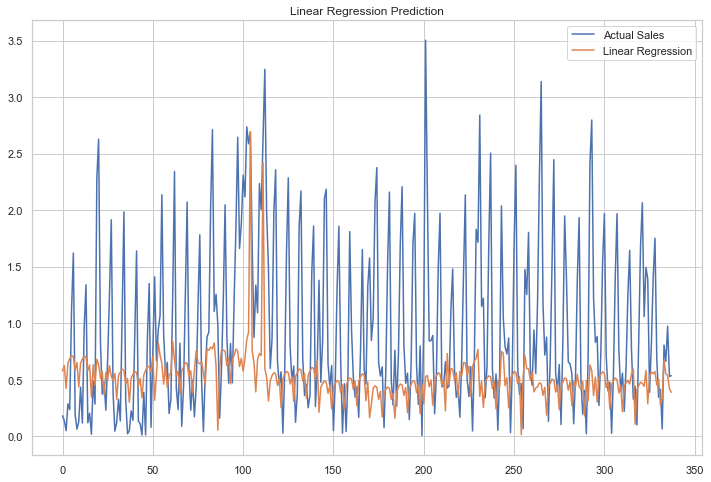

In [96]:
plt.figure(figsize=(12,8))
plt.plot(ytest, label ='Actual Sales')
plt.plot(lin_pred, label='Linear Regression')
plt.legend(loc='best')
plt.title('Linear Regression Prediction')
plt.show()

In [97]:
mse = mean_squared_error(ytest, lin_pred ).round(2)
msle = mean_squared_log_error(ytest, lin_pred)
rmse = np.sqrt(mean_squared_error(ytest, lin_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(ytest, lin_pred)).round(2)

model_results = pd.DataFrame([['Linear', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
model_results

,Model,MSE,MSLE,RMSE,RMSLE
0,Linear,0.68,0.154649,0.82,0.39


### Decision Tree

In [98]:
decision_tree = DecisionTreeRegressor()
model_dtree = decision_tree.fit(Xtrain, ytrain)

In [99]:
# Make prediction
tree_pred = model_dtree.predict(Xtest)

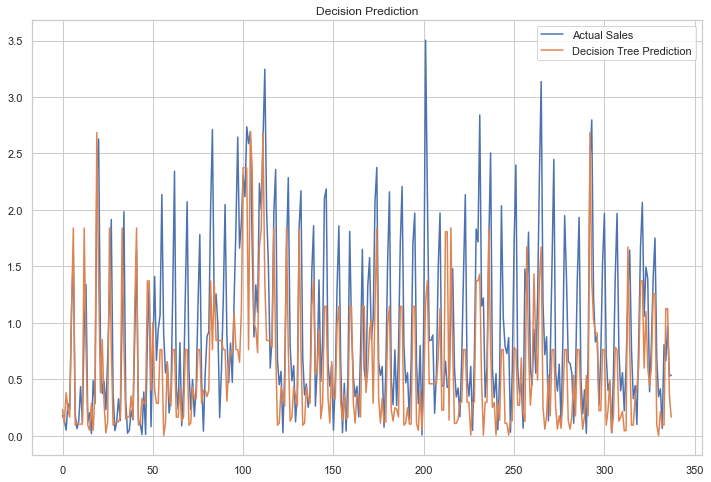

In [100]:
plt.figure(figsize=(12,8))
plt.plot(ytest, label ='Actual Sales')
plt.plot(tree_pred, label='Decision Tree Prediction')
plt.legend(loc='best')
plt.title('Decision Prediction')
plt.show()

In [101]:
mse = mean_squared_error(ytest, tree_pred )
msle = mean_squared_log_error(ytest, tree_pred)
rmse = np.sqrt(mean_squared_error(ytest, tree_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(ytest, tree_pred)).round(2)

results = pd.DataFrame([['Decision Tree', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results

,Model,MSE,MSLE,RMSE,RMSLE
0,Decision Tree,0.386469,0.092922,0.62,0.3


### Random Forest

In [102]:
Tree_random = RandomForestRegressor(random_state=0)
Tree_random.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=0)

In [103]:
rand_tree__predict = Tree_random.predict(Xtest)

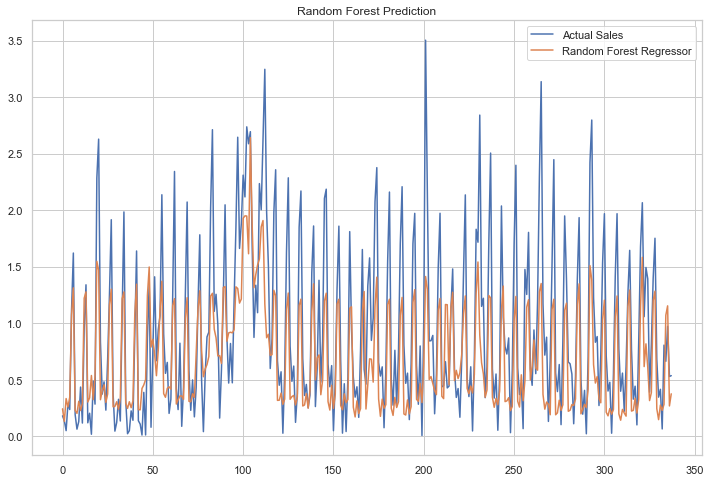

In [104]:
plt.figure(figsize=(12,8))
plt.plot(ytest, label ='Actual Sales')
plt.plot(rand_tree__predict, label='Random Forest Regressor')
plt.legend(loc='best')
plt.title('Random Forest Prediction')
plt.show()

In [105]:
mse = mean_squared_error(ytest, rand_tree__predict )
msle = mean_squared_log_error(ytest, rand_tree__predict)
rmse = np.sqrt(mean_squared_error(ytest, rand_tree__predict))
rmsle = np.sqrt(mean_squared_log_error(ytest, rand_tree__predict))

model_results = pd.DataFrame([['Random Forest', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
model_results

,Model,MSE,MSLE,RMSE,RMSLE
0,Random Forest,0.255807,0.053891,0.505774,0.232145


<b> From the results of the 3 models used above, we choose the Random Forest Regressor as the baseline model.<b>
    
    It has a very good RMSLE score which makes it a strong model.
    
    No further tuning was done on the model.

## Model evaluation

In [106]:
store_data['store_nbr']= store_data['store_nbr'].astype(str)
test_data['store_nbr']= test_data['store_nbr'].astype(str)

In [107]:
def prepareTestData(df):
    test_data = getDateFeatures(df, 'date')
    train_store = test_data.merge(store_data, how='left', on=['store_nbr'])
    all_data = train_store.merge(holidays_events, how='left', on=['date'])
    all_data['day_type'] = all_data.apply(dayType, axis=1)
    all_data.replace({'locale': {np.nan: 'None'},
                  'locale_name': {np.nan: 'None'},
                  'transferred': {np.nan: False}}, inplace=True)
    cols = ['family', 'city', 'state', 'type', 'locale', 'locale_name', 'day_type', 'transferred']

    for col in cols:
        all_data[col] = encoder.fit_transform(all_data[col])
    
    return all_data

In [108]:
test_d = prepareTestData(test_data)

In [109]:
#working on the promotion column
min_p = test_d['onpromotion'].min()
max_p = test_d['onpromotion'].max()

#add bins to deal with the different values
bins = np.arange(min_p, max_p, (max_p - min_p)/5)
labels = [f"bin_{i}" for i in range(len(bins) -1)]

test_d['promotion'] = pd.cut(test_d['onpromotion'], bins = bins, labels = labels)

#using the mode to fill in missing values in promotion column
mode = test_d['promotion'].mode()[0]
test_d['promotion'].fillna(mode, inplace=True)

promotion_encoder = LabelEncoder()
test_d['promotion'] = promotion_encoder.fit_transform(test_d['promotion'])

In [110]:
test_d = test_d.set_index('date')
test_d = test_d.resample('D').mean()

test1_d = test_d.copy()
test1_d.reset_index(inplace=True)


test1_d.fillna(0, inplace=True)
scaler = StandardScaler()
test1_d[test1_d.columns[1:]]= scaler.fit_transform(test1_d[test1_d.columns[1:]])


In [111]:
#test_drop_columns = ['id', 'description', 'holiday_type']
test_drop_columns = ['id']

In [112]:
test2_d = test1_d.drop(columns=test_drop_columns)

In [113]:
y_test = pd.DataFrame(test2_d, columns = test2_d.columns)
y_test.set_index('date', inplace=True)
y_test = abs(y_test)

In [114]:
predict = Tree_random.predict(y_test)

In [115]:
test1_d['sales'] = predict

In [116]:
test1_d[['id', 'sales']].to_csv('submission.csv', index=False)